#### IMPORTAÇÃO DAS BIBLIOTECAS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import splrep, splev

#### IMPORTAÇÃO DOS DADOS

In [2]:
SiO2_PDA = pd.read_csv("SiO2@PDA.txt", header=0, sep="\t", engine="python", decimal=",")
MoS2_NS_sodio = pd.read_csv("MoS2 NS - Sódio.txt", header=0, sep="\t", engine="python", decimal=",")
HCS_MoS2_3 = pd.read_csv("HCS@MoS2 (3).txt", header=0, sep="\t", engine="python", decimal=",")

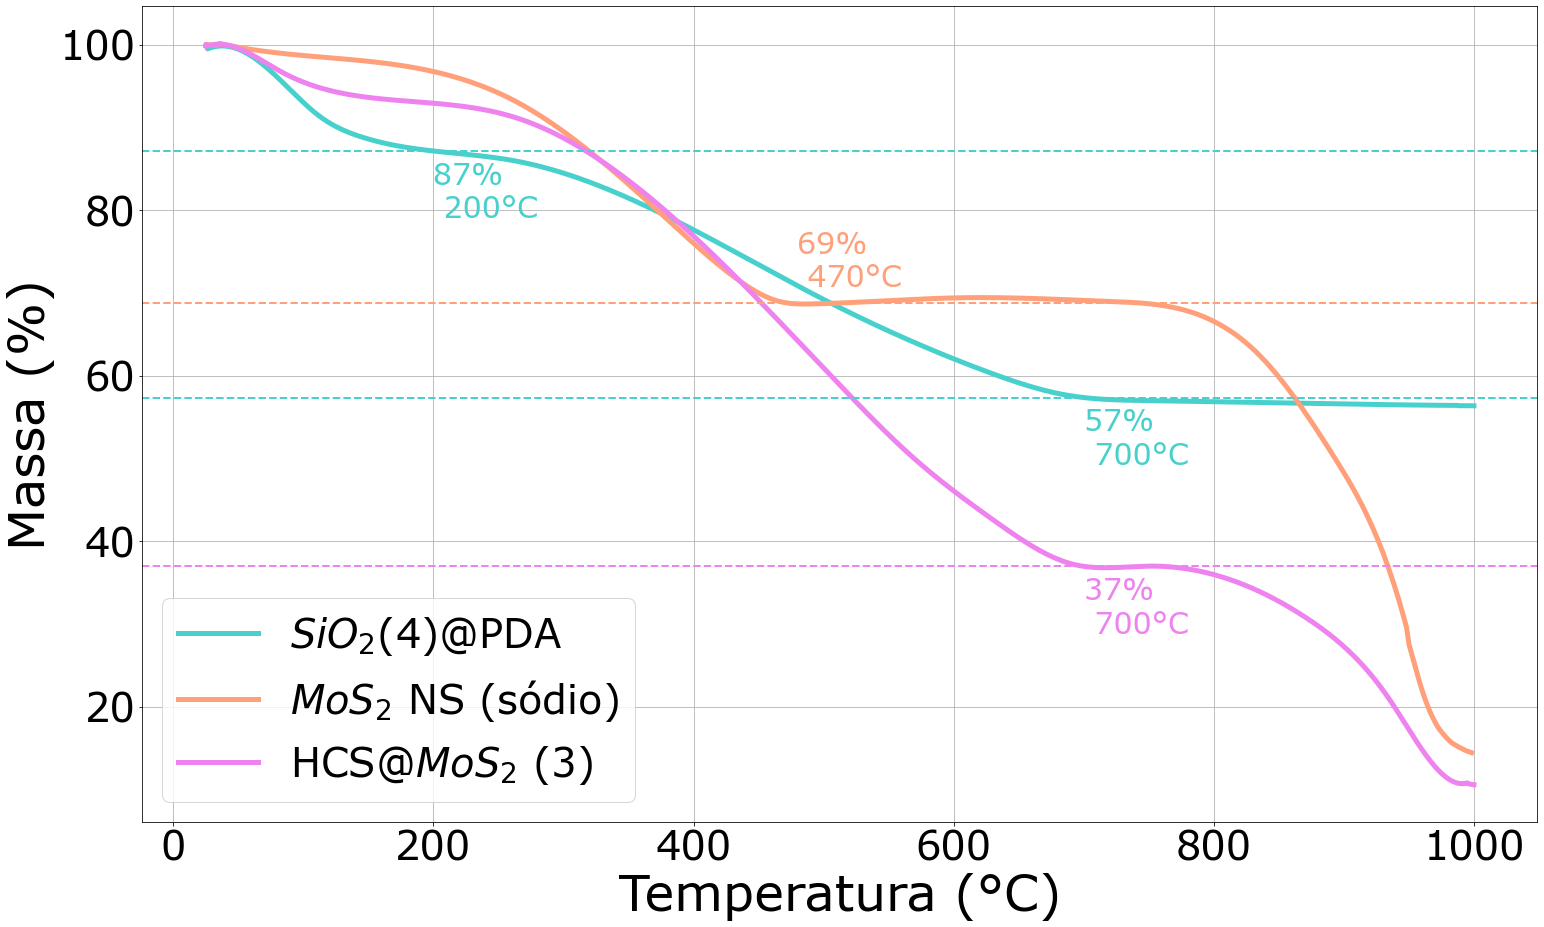

In [3]:
# Função para limpar e preparar os dados
def clean_and_sort_data(x, y):
    mask = np.isfinite(x) & np.isfinite(y)  # Remove NaNs e infinitos
    x_clean, y_clean = x[mask], y[mask]
    sorted_indices = np.argsort(x_clean)    # Ordena os dados por x
    return x_clean[sorted_indices], y_clean[sorted_indices]

# Função para aplicar suavização apenas na região intermediária
def smooth_partial(x, y, start_skip=5, end_skip=25, s=50):
    x_initial = x[:start_skip]
    y_initial = y[:start_skip]
    
    x_final = x[-end_skip:]
    y_final = y[-end_skip:]
    
    x_middle = x[start_skip:-end_skip]
    y_middle = y[start_skip:-end_skip]
    
    # Aplicar spline na região intermediária
    spline = splrep(x_middle, y_middle, s=s)
    y_middle_smoothed = splev(x_middle, spline)
    
    # Reunir os dados suavizados e não suavizados
    x_combined = np.concatenate([x_initial, x_middle, x_final])
    y_combined = np.concatenate([y_initial, y_middle_smoothed, y_final])
    
    return x_combined, y_combined

# Função para encontrar o ponto mínimo em relação ao eixo y em uma faixa específica
def find_min_in_region(x, y, x_min, x_max):
    # Filtrar os dados dentro da região
    mask = (x >= x_min) & (x <= x_max)
    x_filtered, y_filtered = x[mask], y[mask]
    
    # Identificar o índice do valor mínimo em y
    min_index = np.argmin(y_filtered)
    return x_filtered[min_index], y_filtered[min_index]

# Limpar e ajustando os dados
x_SiO2_PDA, y_SiO2_PDA = clean_and_sort_data(SiO2_PDA.iloc[:, 0].values, SiO2_PDA.iloc[:, 2].values)
x_MoS2_NS_sodio, y_MoS2_NS_sodio = clean_and_sort_data(MoS2_NS_sodio.iloc[:, 0].values, MoS2_NS_sodio.iloc[:, 2].values)
x_HCS_MoS2_3, y_HCS_MoS2_3 = clean_and_sort_data(HCS_MoS2_3.iloc[:, 0].values, HCS_MoS2_3.iloc[:, 2].values)

# Aplicar a suavização parcial nos dados
x_SiO2_PDA_smoothed, y_SiO2_PDA_smoothed = smooth_partial(x_SiO2_PDA, y_SiO2_PDA, s=25)
x_MoS2_NS_sodio_smoothed, y_MoS2_NS_sodio_smoothed = smooth_partial(x_MoS2_NS_sodio, y_MoS2_NS_sodio, s=100)
x_HCS_MoS2_3_smoothed, y_HCS_MoS2_3_smoothed = smooth_partial(x_HCS_MoS2_3, y_HCS_MoS2_3, end_skip=10, s=100)

# Encontrar os pontos mínimos nas regiões específicas
x_min_SiO2_PDA_100_200, y_min_SiO2_PDA_100_200 = find_min_in_region(
    x_SiO2_PDA_smoothed, y_SiO2_PDA_smoothed, 100, 200
)
x_min_SiO2_PDA_600_700, y_min_SiO2_PDA_600_700 = find_min_in_region(
    x_SiO2_PDA_smoothed, y_SiO2_PDA_smoothed, 600, 700
)

x_min_MoS2_NS_sodio, y_min_MoS2_NS_sodio = find_min_in_region(
    x_MoS2_NS_sodio_smoothed, y_MoS2_NS_sodio_smoothed, 400, 470
)
x_min_HCS_MoS2, y_min_HCS_MoS2 = find_min_in_region(
    x_HCS_MoS2_3_smoothed, y_HCS_MoS2_3_smoothed, 600, 700
)

# Representação gráfica
plt.rcParams['font.family'] = 'Verdana'
plt.figure(figsize=(25, 15))

# Plotar os dados suavizados
plt.plot(x_SiO2_PDA_smoothed, y_SiO2_PDA_smoothed, label=r'$SiO_2$(4)@PDA', linewidth=5, linestyle='-', color='mediumturquoise')
plt.plot(x_MoS2_NS_sodio_smoothed, y_MoS2_NS_sodio_smoothed, label=r'$MoS_2$ NS (sódio)', linewidth=5, linestyle='-', color='lightsalmon')
plt.plot(x_HCS_MoS2_3_smoothed, y_HCS_MoS2_3_smoothed, label=r'HCS@$MoS_2$ (3)', linewidth=5, linestyle='-', color='violet')

# Adicionar linhas horizontais tracejadas e anotações para os pontos mínimos
plt.axhline(y_min_SiO2_PDA_100_200, color='mediumturquoise', linestyle='--', linewidth=2)
plt.text(
    x_min_SiO2_PDA_100_200+0, y_min_SiO2_PDA_100_200-5, f'{y_min_SiO2_PDA_100_200:.0f}% \n {x_min_SiO2_PDA_100_200:.0f}°C', 
    color='mediumturquoise', fontsize=30, va='center', rotation=0
)

plt.axhline(y_min_SiO2_PDA_600_700, color='mediumturquoise', linestyle='--', linewidth=2)
plt.text(
    x_min_SiO2_PDA_600_700+0, y_min_SiO2_PDA_600_700-5, f'{y_min_SiO2_PDA_600_700:.0f}% \n {x_min_SiO2_PDA_600_700:.0f}°C', 
    color='mediumturquoise', fontsize=30, va='center', rotation=0
)

plt.axhline(y_min_MoS2_NS_sodio, color='lightsalmon', linestyle='--', linewidth=2)
plt.text(
    x_min_MoS2_NS_sodio+10, y_min_MoS2_NS_sodio+5, f'{y_min_MoS2_NS_sodio:.0f}% \n {x_min_MoS2_NS_sodio:.0f}°C', 
    color='lightsalmon', fontsize=30, va='center', rotation=0
)

plt.axhline(y_min_HCS_MoS2, color='violet', linestyle='--', linewidth=2)
plt.text(
    x_min_HCS_MoS2+0, y_min_HCS_MoS2-5, f'{y_min_HCS_MoS2:.0f}% \n {x_min_HCS_MoS2:.0f}°C', 
    color='violet', fontsize=30, va='center', rotation=0
)

# Configurações do gráfico
plt.xlabel("Temperatura (°C)", size=50)
plt.ylabel("Massa (%)", size=50)
plt.tick_params(labelsize=40)
plt.rcParams['legend.fontsize'] = 40
plt.legend()
plt.grid()

# Salvar e exibir o gráfico
plt.savefig('TGA.png', dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()